In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/HousingData.csv")

In [ ]:
df.shape

(506, 14)

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


Data Pre Processing

In [ ]:
df.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,True,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
x = df.drop(columns = 'MEDV')
y = df['MEDV']

In [ ]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [ ]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

splitting the data


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_train)
y_actual=y_train

In [ ]:
from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error
r2 = r2_score(y_actual, y_pred)
mse=mean_squared_error(y_actual, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'r-squared: {r2:.2f}')

Mean Squared Error (MSE): 20.10
r-squared: 0.75


Text(0, 0.5, 'y_pred')

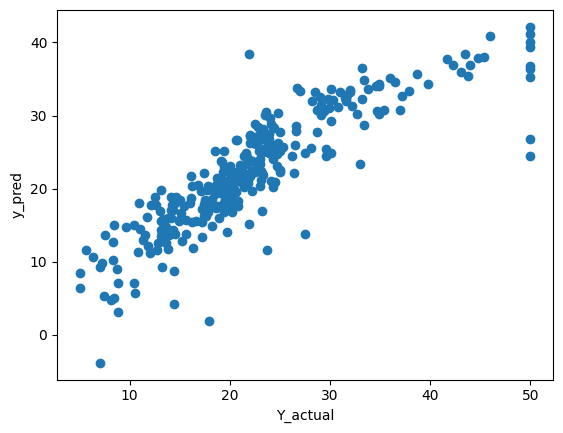

In [ ]:
plt.scatter(y_actual,y_pred)
plt.xlabel('Y_actual')
plt.ylabel('y_pred')

In [ ]:
import seaborn as sns

<ipython-input-42-008a0bafa815>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_actual),bins=50)


<Axes: xlabel='MEDV', ylabel='Density'>

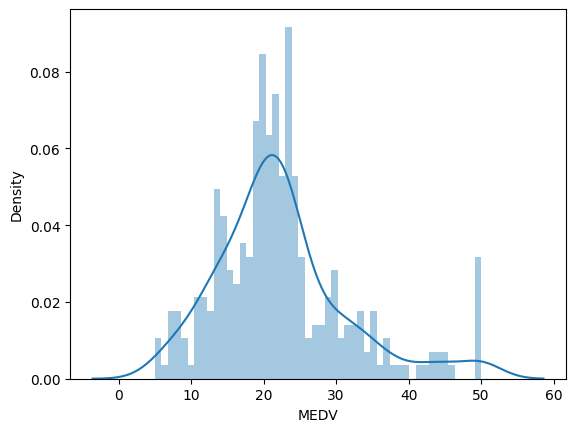

In [ ]:
sns.distplot((y_actual),bins=50)

<ipython-input-40-e2f98d87d835>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_pred),bins=50)


<Axes: ylabel='Density'>

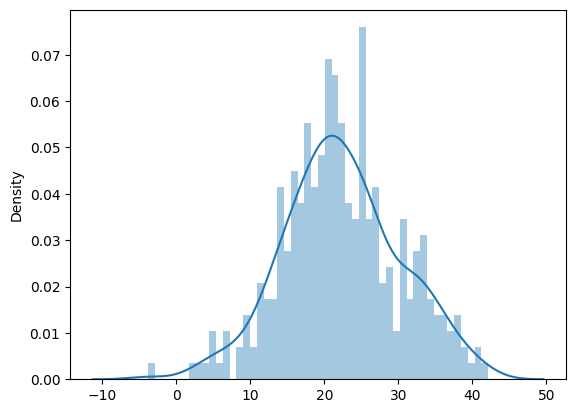

In [ ]:
sns.distplot((y_pred),bins=50)

In [ ]:
y_pred

array([12.13725995, 28.19554941, 22.38352194, 11.58754334, 15.5238987 ,
       26.47921096, 17.40556289, 17.7498975 , 14.98115132, 28.48810209,
        1.93168814, 35.74292577, 19.83348033, 27.80708574, 18.08037808,
       18.59477695, 19.82719055, 22.28650057,  4.72099326,  6.40816276,
       31.92205777, 14.37601411, 27.18812173, 25.07704835, 31.95618341,
        4.2569836 , 15.1141186 , 17.65901043, 21.37489382, 20.57140587,
       36.89257547, 21.15669845, 12.82446728, 17.68526446, 21.2503969 ,
       21.15241976, 16.94790216, 17.7690711 , 20.92542357, 18.8513605 ,
       26.2554536 , 16.6988541 , 14.35440585, 33.71123896, 14.43981338,
       24.83437225, 17.85026661, 19.74487145, 19.72972062, 24.27143478,
        9.03808544, 13.20621179, 13.67433748, 21.56951249, 41.187382  ,
       16.83610145, 30.28952851, 16.8550177 , 35.17382066, 17.67981416,
       23.82564493, 13.78205739, 18.03399971, 17.58367009, 20.70254304,
       14.70543951, 12.54080463, 15.3583348 , 29.68692309, 15.47

In [ ]:
pip install --upgrade scikit-learn

In [ ]:
pip install sklearn.all()

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install sklearn.all()'


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Data.csv")

In [ ]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
x = dataset[["Country","Age","Salary"]]

In [ ]:
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [ ]:
y = data[["Purchased"]]

In [ ]:
y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer (missing_values=np.nan, strategy='mean')

In [ ]:
imputer = imputer.fit(x.iloc[:,1:3])

In [ ]:
x.iloc[:,1:3] = imputer.transform(x.iloc[:,1:3])

<ipython-input-63-4523c0f99013>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,1:3] = imputer.transform(x.iloc[:,1:3])


In [ ]:
x

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder_x=LabelEncoder()

In [ ]:
x.iloc[:,0]=label_encoder_x.fit_transform(x.iloc[:,0])

<ipython-input-67-35dbb46e6824>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,0]=label_encoder_x.fit_transform(x.iloc[:,0])
<ipython-input-67-35dbb46e6824>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,0]=label_encoder_x.fit_transform(x.iloc[:,0])


In [ ]:
x

,Country,Age,Salary
0,0,44.000000,72000.000000
1,2,27.000000,48000.000000
2,1,30.000000,54000.000000
3,2,38.000000,61000.000000
4,1,40.000000,63777.777778
5,0,35.000000,58000.000000
6,2,38.777778,52000.000000
7,0,48.000000,79000.000000
8,1,50.000000,83000.000000
9,0,37.000000,67000.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
onehotencoder = OneHotEncoder()

In [ ]:
x=onehotencoder.fit_transform(dataset.Country.values.reshape(-1,1))

In [ ]:
x

<bound method _cs_matrix.toarray of <10x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>>

In [ ]:
labelencoder_y=LabelEncoder()

In [ ]:
y=labelencoder_y.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
pd.DataFrame(data)

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 0)

In [ ]:
print(x_train)

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
  (6, 0)	1.0
  (7, 0)	1.0


In [ ]:
print(x_test)

  (0, 1)	1.0
  (1, 1)	1.0


In [ ]:
print(y_train)

[1 1 1 0 1 0 0 1]


In [ ]:
print(y_test)

[0 0]


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler(with_mean=False)
x_train = sc.fit_transform(x_train)

In [ ]:
x_test=sc.transform(x_test)

In [ ]:
x_train
pd.DataFrame(x_train)

,0
0,"(0, 1)\t3.0237157840738176"
1,"(0, 0)\t2.0"
2,"(0, 2)\t2.0655911179772892"
3,"(0, 2)\t2.0655911179772892"
4,"(0, 0)\t2.0"
5,"(0, 2)\t2.0655911179772892"
6,"(0, 0)\t2.0"
7,"(0, 0)\t2.0"


In [ ]:
print(x_train)

  (0, 1)	3.0237157840738176
  (1, 0)	2.0
  (2, 2)	2.0655911179772892
  (3, 2)	2.0655911179772892
  (4, 0)	2.0
  (5, 2)	2.0655911179772892
  (6, 0)	2.0
  (7, 0)	2.0


In [ ]:
print(x_test)

  (0, 1)	0.9999999999999998
  (1, 1)	0.9999999999999998


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/melb_data.csv")

In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [ ]:
data.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
na1 = data["BuildingArea"].isna().sum()

In [ ]:
na2 = data["Car"].isna().sum()

In [ ]:
na3 = data["YearBuilt"].isna().sum()

In [ ]:
na4 = data["CouncilArea"].isna().sum()

In [ ]:
print("na count of column Building Area:",{na1})
print("na count of column Car:",{na2})
print("na count of column Year Built:",{na3})
print("na count of column Council Area:",{na4})

na count of column Building Area: {6450}
na count of column Car: {62}
na count of column Year Built: {5375}
na count of column Council Area: {1369}


In [ ]:
print("Total na count:",{na1+na2+na3+na4})

Total na count: {13256}


In [ ]:
data["BuildingArea"] = data["BuildingArea"].fillna(data["BuildingArea"]).mean()

In [ ]:
data["Car"] = data["Car"].fillna(data["Car"]).mean()

In [ ]:
data["YearBuilt"] = data["YearBuilt"].fillna(data["YearBuilt"]).mean()

In [ ]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.610075,202.0,151.96765,1964.684217,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,1.610075,156.0,151.96765,1964.684217,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.610075,134.0,151.96765,1964.684217,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.610075,94.0,151.96765,1964.684217,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,1.610075,120.0,151.96765,1964.684217,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,1.610075,652.0,151.96765,1964.684217,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,1.610075,333.0,151.96765,1964.684217,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,1.610075,436.0,151.96765,1964.684217,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,1.610075,866.0,151.96765,1964.684217,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [ ]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,1.358000e+04,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075e+00,558.416127,1.519676e+02,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,2.220528e-16,3990.669241,2.842276e-14,0.000000,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,1.610075e+00,0.000000,1.519676e+02,1964.684217,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.610075e+00,177.000000,1.519676e+02,1964.684217,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,1.610075e+00,440.000000,1.519676e+02,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,1.610075e+00,651.000000,1.519676e+02,1964.684217,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,1.610075e+00,433014.000000,1.519676e+02,1964.684217,-37.408530,145.526350,21650.000000


In [ ]:
data.isnull()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [ ]:
data["CouncilArea"].fillna("ABC",inplace = True)

In [ ]:
data.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [ ]:
print(data.isnull().sum())

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
d="http://lib.stat.cmu.edu/datasets/boston"

In [ ]:
df = pd.read_csv("",sep = "s+",skiprows=22,header=None)

<ipython-input-18-98f0794cefee>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(d,sep = "s+",skiprows=22,header=None)


In [ ]:
data = np.hstack([df.values[::2,:],df.values[1::2,:2]])

In [ ]:
target = df.values[1::2,:2]

In [ ]:
f_n = [f"feature_{i} "for i in range(data.shape[1])]

In [ ]:
b_df = pd.DataFrame(data,columns = f_n)

In [ ]:
x = b_df.drop("price",axis = 1)

In [ ]:
y = b_df["price"]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train,y_train)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print(f"R-Squared:{r2_score(y_test,y_pred):.2f}")

In [ ]:
plt.scatter(y_test,y_pred,label ="data points")
plt.xlabel("Actual price")
plt.ylabel("Predicted price")
plt.title("Actual vs predicted")


In [ ]:
regression_line = np.polyfit(y_test,y_pred,1)
plt.plot(y_test,regression_line[1],color = "red",label = "regression line")
plt.legend()

Mean Squared Error: 24.29
R-squared: 0.67


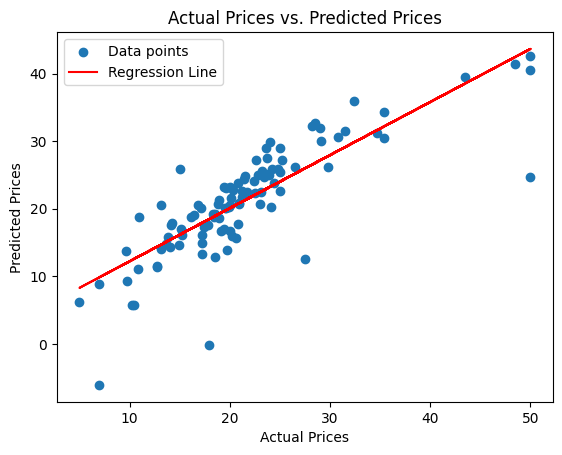

In [ ]:
""# Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 2: Load the Boston Housing Dataset
# URL of the original Boston Housing Prices dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Step 3: Create a DataFrame for the dataset
# Define feature_names if needed
feature_names = [f"Feature_{i}" for i in range(data.shape[1])]
boston_df = pd.DataFrame(data, columns=feature_names)
boston_df['PRICE'] = target

# Step 4: Split the data into training and testing sets
X = boston_df.drop('PRICE', axis=1)  # Features
y = boston_df['PRICE']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Build and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions on the test set and evaluate the model
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared (R2) for evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Step 7: Visualize the model's predictions with a regression line
plt.scatter(y_test, y_pred, label='Data points')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")

# Add a regression line
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, regression_line[0] * y_test + regression_line[1], color='red', label='Regression Line')
plt.legend()

In [ ]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


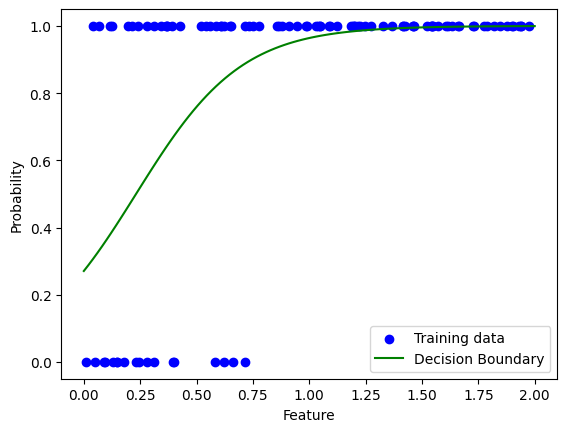

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a dummy dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1)) > 5  # Binary classification

# Add bias term to X
X_b = np.c_[np.ones((100, 1)), X]

# Initialize parameters
theta = np.zeros((2, 1))
m = len(y)
n_iterations = 1000

# Logistic function (sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Logistic regression training loop
for i in range(n_iterations):
    logits = np.dot(X_b, theta)
    y_proba = sigmoid(logits)

    # Compute gradient
    gradient = 1/m * np.dot(X_b.T, (y_proba - y))

    # Update parameters using fixed learning rate (you can modify this if needed)
    theta -= gradient

# Function to make predictions
def predict(X, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    logits = np.dot(X_b, theta)
    return (sigmoid(logits) >= 0.5).astype(int)

# Make predictions on the training set
y_pred = predict(X, theta)

# Plot the decision boundary
x_decision = np.linspace(0, 2, 100).reshape(-1, 1)
X_decision_b = np.c_[np.ones((100, 1)), x_decision]
y_decision_proba = sigmoid(np.dot(X_decision_b, theta))

# Plotting the results
plt.scatter(X, y, color='blue', label='Training data')
plt.plot(x_decision, y_decision_proba, "g-", label="Decision Boundary")
plt.xlabel("Feature")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset for logistic regression
def generate_social_network_data(num_samples=100, random_seed=42):
    """
    Generate a small dummy dataset for logistic regression.

    Parameters:
    - num_samples: number of data points in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_samples, 3) containing the dataset
    """
    np.random.seed(random_seed)
    # Generate random ages between 18 and 65
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    # Generate random clicks on ad (0 or 1)
    clicks = np.random.choice([0, 1], size=num_samples)
    # Introduce a simple relationship between age and clicks for purchasing
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    # Combine the features and target variable
    data = np.column_stack([ages, clicks, purchases])
    return data

# Function to implement logistic regression
def logistic_regression(data, learning_rate=0.01, num_iterations=1000):
    """
    Implement logistic regression on the given dataset.

    Parameters:
    - data: numpy array of shape (n_samples, n_features + 1) containing the dataset
    - learning_rate: learning rate for gradient descent, default is 0.01
    - num_iterations: number of iterations for gradient descent, default is 1000

    Returns:
    - weights: learned coefficients
    """
    # Extract features and target variable
    X = data[:, :-1]
    y = data[:, -1]

    # Initialize weights with zeros
    weights = np.zeros(X.shape[1])

    # Gradient Descent
    for _ in range(num_iterations):
        # Calculate predicted probabilities
        predictions = 1 / (1 + np.exp(-np.dot(X, weights)))

        # Compute gradients
        gradients = np.dot(X.T, (predictions - y)) / len(y)

        # Update weights
        weights -= learning_rate * gradients

    return weights

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:  # Displaying the first 10 rows
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Implement logistic regression
learned_weights = logistic_regression(social_network_data)

# Displaying the results
print("\nLearned Weights:")
print("Intercept:", learned_weights[0])
for i in range(1, len(learned_weights)):
    print(f"Coefficient for Feature {i}: {learned_weights[i]}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset for KNN classification
def generate_social_network_data(num_samples=100, random_seed=42):
    """
    Generate a small dummy dataset for KNN classification.

    Parameters:
    - num_samples: number of data points in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_samples, 3) containing the dataset
    """
    np.random.seed(random_seed)
    # Generate random ages between 18 and 65
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    # Generate random clicks on ad (0 or 1)
    clicks = np.random.choice([0, 1], size=num_samples)
    # Introduce a simple relationship between age and clicks for purchasing
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    # Combine the features and target variable
    data = np.column_stack([ages, clicks, purchases])
    return data

# Function to implement k-Nearest Neighbors classification
def knn_predict(new_point, data, k=3):
    """
    Predict the class of a new point using k-Nearest Neighbors.

    Parameters:
    - new_point: numpy array of shape (n_features,) containing the features of the new point
    - data: numpy array of shape (n_samples, n_features + 1) containing the dataset
    - k: number of neighbors to consider, default is 3

    Returns:
    - predicted_class: predicted class for the new point (0 or 1)
    """
    # Extract features and target variable from the dataset
    X = data[:, :-1]
    y = data[:, -1]

    # Calculate Euclidean distances between the new point and all data points
    distances = np.linalg.norm(X - new_point, axis=1)

    # Find indices of the k nearest neighbors
    nearest_neighbors_indices = np.argsort(distances)[:k]

    # Get the classes of the k nearest neighbors
    nearest_neighbors_classes = y[nearest_neighbors_indices]

    # Predict the class based on majority vote
    predicted_class = np.bincount(nearest_neighbors_classes.astype(int)).argmax()

    return predicted_class

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:  # Displaying the first 10 rows
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Create a new point for prediction (you can replace this with actual test data)
new_point = np.array([35, 1])

# Implement k-Nearest Neighbors classification
predicted_class = knn_predict(new_point, social_network_data)

# Displaying the results
print("\nNew Point Features:")
print("Age:", new_point[0])
print("Clicks on Ad:", new_point[1])
print("\nPredicted Purchase Class:", predicted_class)


Dataset:
Age | Clicks on Ad | Purchase
-----------------------------
35.60 | 0.0 | 0.0
62.68 | 1.0 | 1.0
52.40 | 0.0 | 1.0
46.14 | 0.0 | 1.0
25.33 | 1.0 | 1.0
25.33 | 0.0 | 0.0
20.73 | 1.0 | 0.0
58.71 | 1.0 | 1.0
46.25 | 1.0 | 1.0
51.28 | 0.0 | 1.0

New Point Features:
Age: 35
Clicks on Ad: 1

Predicted Purchase Class: 1


In [ ]:
import numpy as np

# Function to generate a small dummy dataset for Decision Tree classification
def generate_social_network_data(num_samples=100, random_seed=42):
    np.random.seed(random_seed)
    ages = np.random.uniform(low=18, high=65, size=num_samples)
    clicks = np.random.choice([0, 1], size=num_samples)
    purchase_prob = 1 / (1 + np.exp(-(0.1 * (ages - 30) + 0.05 * (clicks - 0.5))))
    purchases = np.random.binomial(1, purchase_prob)
    data = np.column_stack([ages, clicks, purchases])
    return data

# Helper function to calculate Gini impurity
def calculate_gini_impurity(y1, y2):
    size1 = len(y1)
    size2 = len(y2)
    total_size = size1 + size2

    if total_size == 0:
        return 0

    # Convert y1 and y2 to integers
    y1 = y1.astype(int)
    y2 = y2.astype(int)

    p1 = size1 / total_size
    p2 = size2 / total_size

    gini1 = 1 - np.sum((np.bincount(y1) / size1) ** 2)
    gini2 = 1 - np.sum((np.bincount(y2) / size2) ** 2)

    gini = p1 * gini1 + p2 * gini2

    return gini

# Helper function to find the best split in the data
def find_best_split(X, y):
    num_samples, num_features = X.shape
    best_gini = float('inf')
    best_split = None

    for feature_index in range(num_features):
        unique_values = np.unique(X[:, feature_index])
        for threshold in unique_values:
            left_indices = X[:, feature_index] <= threshold
            right_indices = ~left_indices
            gini = calculate_gini_impurity(y[left_indices], y[right_indices])

            if gini < best_gini:
                best_gini = gini
                best_split = {'feature_index': feature_index, 'threshold': threshold}

    return best_split

# Helper function to recursively grow the decision tree
def grow_tree(X, y, depth=0, max_depth=None):
    if len(np.unique(y)) == 1:
        # If all labels are the same, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    if max_depth is not None and depth == max_depth:
        # If maximum depth is reached, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    split = find_best_split(X, y)

    if split is None:
        # If no split is found, create a leaf node with the majority class
        return {'value': np.bincount(y.astype(int)).argmax()}

    left_indices = X[:, split['feature_index']] <= split['threshold']
    right_indices = ~left_indices

    left_tree = grow_tree(X[left_indices], y[left_indices], depth + 1, max_depth)
    right_tree = grow_tree(X[right_indices], y[right_indices], depth + 1, max_depth)

    # Create a node representing the current split
    node = {
        'split': (split['feature_index'], split['threshold']),
        'left': left_tree,
        'right': right_tree
    }

    return node

# Function to build a Decision Tree
def build_decision_tree(data, max_depth=None):
    X = data[:, :-1]
    y = data[:, -1]

    tree = grow_tree(X, y, max_depth=max_depth)

    return tree

# Helper function to print the tree structure
def print_tree_structure(tree, indent=''):
    if 'split' in tree:
        feature_index, threshold = tree['split']
        print(f"{indent}Feature {feature_index} <= {threshold:.2f}:")
        print_tree_structure(tree['left'], indent + '  ')
        print(f"{indent}Feature {feature_index} > {threshold:.2f}:")
        print_tree_structure(tree['right'], indent + '  ')
    else:
        print(f"{indent}Class: {tree['value']}")

# Generate small dummy social network data
social_network_data = generate_social_network_data()

# Display the dataset
print("Dataset:")
print("Age | Clicks on Ad | Purchase")
print("-----------------------------")
for row in social_network_data[:10]:
    print(f"{row[0]:.2f} | {row[1]} | {row[2]}")

# Build a Decision Tree
decision_tree = build_decision_tree(social_network_data)

# Displaying the results
print("\nDecision Tree Structure:")
print_tree_structure(decision_tree)


Dataset:
Age | Clicks on Ad | Purchase
-----------------------------
35.60 | 0.0 | 0.0
62.68 | 1.0 | 1.0
52.40 | 0.0 | 1.0
46.14 | 0.0 | 1.0
25.33 | 1.0 | 1.0
25.33 | 0.0 | 0.0
20.73 | 1.0 | 0.0
58.71 | 1.0 | 1.0
46.25 | 1.0 | 1.0
51.28 | 0.0 | 1.0

Decision Tree Structure:
Feature 0 <= 45.84:
  Feature 1 <= 0.00:
    Feature 0 <= 42.66:
      Feature 0 <= 42.44:
        Feature 0 <= 36.27:
          Feature 0 <= 35.60:
            Feature 0 <= 34.77:
              Feature 0 <= 33.28:
                Feature 0 <= 27.38:
                  Feature 0 <= 26.55:
                    Feature 0 <= 19.19:
                      Feature 0 <= 18.97:
                        Class: 0
                      Feature 0 > 18.97:
                        Class: 1
                    Feature 0 > 19.19:
                      Feature 0 <= 22.16:
                        Class: 0
                      Feature 0 > 22.16:
                        Feature 0 <= 23.62:
                          Class: 1
             

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset from the provided path
data_path = '/content/Social_Network_Ads.csv'
df = pd.read_csv(data_path)

# Convert Gender to numerical format (0 for Female, 1 for Male)
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

# Create features (X) and labels (y)
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# k-Nearest Neighbors (k-NN)
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# Decision Tree
tree_model = DecisionTreeClassifier(max_depth=3)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Evaluate models
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
tree_accuracy = accuracy_score(y_test, tree_predictions)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("k-Nearest Neighbors Accuracy:", knn_accuracy)
print("Decision Tree Accuracy:", tree_accuracy)

# Additional evaluation metrics
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, logistic_predictions))

print("\nk-Nearest Neighbors Classification Report:")
print(classification_report(y_test, knn_predictions))

print("\nDecision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))


Logistic Regression Accuracy: 0.65
k-Nearest Neighbors Accuracy: 0.8
Decision Tree Accuracy: 0.9125

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.65      1.00      0.79        52
           1       0.00      0.00      0.00        28

    accuracy                           0.65        80
   macro avg       0.33      0.50      0.39        80
weighted avg       0.42      0.65      0.51        80


k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        52
           1       0.75      0.64      0.69        28

    accuracy                           0.80        80
   macro avg       0.79      0.76      0.77        80
weighted avg       0.80      0.80      0.80        80


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generated Dummy Customer Dataset:
Buying Behavior | Annual Spending
[[    7 14067]
 [    4 49033]
 [    8 24599]
 [    5 36222]
 [    7 12837]
 [   10 15039]
 [    3 31818]
 [    7 20115]
 [    8 11965]
 [    5 25538]
 [    4 43530]
 [    8  6056]
 [    8 33482]
 [    3 48716]
 [    6  9110]
 [    5 14773]
 [    2 28266]
 [    8 18412]
 [    6 34270]
 [    2  7910]
 [    5 46453]
 [    1 26446]
 [   10  1206]
 [    6 22518]
 [    9 23361]
 [    1 24419]
 [   10 49702]
 [    3 42523]
 [    7 46151]
 [    4 23403]
 [    9 19141]
 [    3 15820]
 [    5 41342]
 [    3  7374]
 [    7  2678]
 [    5 34827]
 [    9 17198]
 [    7 10914]
 [    2 28890]
 [    4 23299]
 [    9 44585]
 [    2 44689]
 [   10 43557]
 [    9 45020]
 [   10  3693]
 [    5 30467]
 [    2 30723]
 [    4 47699]
 [    7  4627]
 [    8 26939]
 [    3 49925]
 [    1 43941]
 [    4 22834]
 [    2 19047]
 [    8 27105]
 [    4 11230]
 [    2 16707]
 [    6 22976]
 [    6 45262]
 [   10 24776]
 [    4 31080]
 [    6  2306]
 [

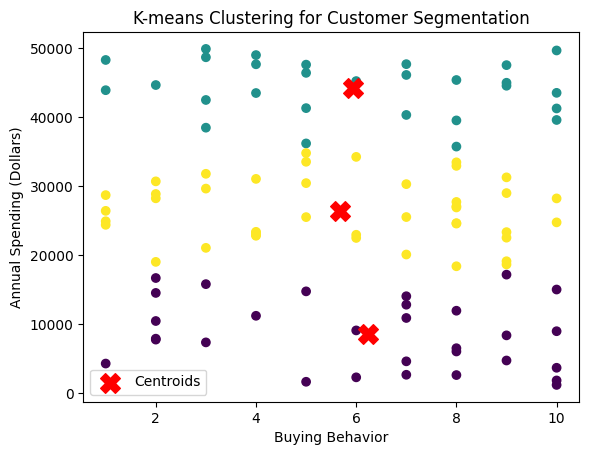

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a dummy dataset with buying behavior
def generate_customer_data(num_customers=100, random_seed=42):
    """
    Generate a small dummy dataset for customer segmentation.

    Parameters:
    - num_customers: number of customers in the dataset
    - random_seed: seed for reproducibility

    Returns:
    - data: numpy array of shape (num_customers, 2) containing the dataset
    """
    np.random.seed(random_seed)

    # Generate random buying behavior scores between 1 and 10
    buying_behavior = np.random.randint(1, 11, size=num_customers)

    # Generate random annual spending in dollars
    annual_spending = np.random.randint(1000, 50001, size=num_customers)

    # Combine the features into a 2D array
    data = np.column_stack((buying_behavior, annual_spending))

    return data

# Function to perform K-means clustering
def k_means_clustering(data, k, max_iterations=100):
    """
    Perform K-means clustering on the given data.

    Parameters:
    - data: numpy array of shape (n_samples, n_features) containing the dataset
    - k: number of clusters
    - max_iterations: maximum number of iterations for the algorithm

    Returns:
    - centroids: final centroids of the clusters
    - labels: labels indicating the cluster to which each data point belongs
    """
    # Step 1: Randomly initialize centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]

    for _ in range(max_iterations):
        # Step 2: Assign each data point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Step 3: Update centroids based on the mean of data points in each cluster
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])

        # Step 4: Check for convergence
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

# Generate dummy customer data
dummy_customer_data = generate_customer_data()

# Display the dummy dataset
print("Generated Dummy Customer Dataset:")
print("Buying Behavior | Annual Spending")
print(dummy_customer_data)

# Set the number of clusters
num_clusters = 3

# Run K-means clustering
final_centroids, cluster_labels = k_means_clustering(dummy_customer_data, num_clusters)

# Displaying the results
plt.scatter(dummy_customer_data[:, 0], dummy_customer_data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering for Customer Segmentation')
plt.xlabel('Buying Behavior')
plt.ylabel('Annual Spending (Dollars)')
plt.legend()
plt.show()


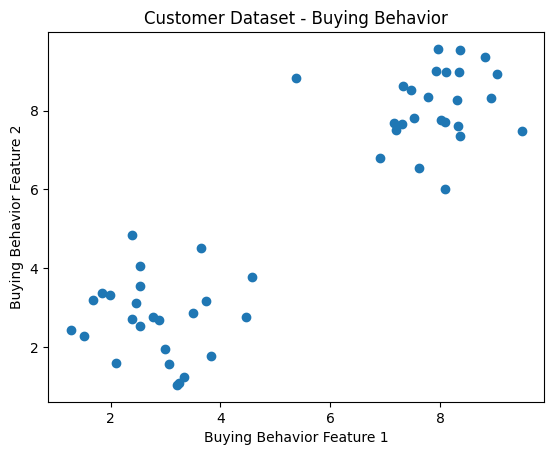

IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a small dummy dataset with buying behavior
def generate_customer_data(num_samples=50, random_seed=42):
    np.random.seed(random_seed)
    cluster1 = np.random.normal(loc=[3, 3], scale=[1, 1], size=(num_samples // 2, 2))
    cluster2 = np.random.normal(loc=[8, 8], scale=[1, 1], size=(num_samples // 2, 2))
    data = np.vstack([cluster1, cluster2])
    return data

# Function to perform hierarchical clustering
def hierarchical_clustering(data):
    distances = np.linalg.norm(data[:, np.newaxis] - data, axis=2)
    num_samples = data.shape[0]
    linkage_matrix = np.zeros((num_samples - 1, 4))
    clusters = list(range(num_samples))

    def find_min_distance(distances, clusters):
        min_distance = np.inf
        min_i, min_j = -1, -1
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                if distances[clusters[i], clusters[j]] < min_distance:
                    min_distance = distances[clusters[i], clusters[j]]
                    min_i, min_j = clusters[i], clusters[j]
        return min_i, min_j

    for step in range(num_samples - 1):
        merge_i, merge_j = find_min_distance(distances, clusters)
        linkage_matrix[step, 0] = merge_i
        linkage_matrix[step, 1] = merge_j
        linkage_matrix[step, 2] = distances[merge_i, merge_j]
        linkage_matrix[step, 3] = len(clusters)
        clusters.remove(merge_i)
        clusters.remove(merge_j)
        clusters.append(num_samples + step)

        # Use the indices of remaining clusters to update distances
        remaining_clusters = list(range(len(clusters)))
        distances = distances[np.ix_(remaining_clusters, remaining_clusters)]

    return linkage_matrix

# Displaying the dataset
customer_data = generate_customer_data()
plt.scatter(customer_data[:, 0], customer_data[:, 1])
plt.title('Customer Dataset - Buying Behavior')
plt.xlabel('Buying Behavior Feature 1')
plt.ylabel('Buying Behavior Feature 2')
plt.show()

# Run hierarchical clustering
linkage_matrix = hierarchical_clustering(customer_data)

# Displaying the linkage matrix
print("Linkage Matrix:")
print(linkage_matrix)
